In [57]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import statsmodels
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import mse,rmse
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('artificial_1.csv' ,parse_dates=["date"])


#df.to_string()
print(df.head())

        date      value  temperature
0 2018-01-01  72.624345          6.0
1 2018-01-02  65.388244         10.0
2 2018-01-03  65.471828         11.0
3 2018-01-04  64.927031          8.0
4 2018-01-05  66.865408         10.0


In [14]:
def evaluatereg(actual,prediction):
    
    return  (mse(actual, prediction), rmse(actual, prediction),r2_score(actual,prediction),np.mean(np.abs((prediction - actual) /np.abs(actual))) * 100) 

In [3]:
from pandas import concat
temps = DataFrame(df.value)
width = 3
window4 = temps.shift(2).expanding()
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)
dataframe = concat([window.min(), window.mean(), window.max()], axis=1)
dataframe.columns = [ 'min_value', 'mean_value', 'max_value']
temps = DataFrame(df.value)


dates = pd.to_datetime(df.date)
test_df = df.copy()
test_df["year"] = dates.dt.year
test_df["month"] = dates.dt.month
test_df["day"] = dates.dt.day


dataframe3= pd.concat([test_df["year"], test_df["month"],test_df["day"], dataframe.min_value, dataframe.mean_value, dataframe.max_value, window4.min(), window4.mean(), window4.max(), temps.shift(1), temps.shift(2), temps.shift(3),temps.shift(7),temps.shift(8)],axis=1)

dataframe3.columns = [ 'year', 'month', 'day','min_rolling','mean_rolling',  'max_rolling','min_expanding', 'mean_expanding', 'max_expanding','t-1','t-2','t-3','t-7','t-8']

dataframeee=[df,dataframe3]

dataframe2= pd.concat(dataframeee, "columns").dropna()
#seasons
seasonsdataframe=DataFrame()
l=[]
for i in test_df.month.values:
    if i== 6 or 7 or 8:
        l.append('2')
    if i == 3 or 4 or 5:
        l.append('1')
    if i== 9 or 10 or 11:
        l.append('3')
    if i== 12 or 1 or 2:
        l.append('4')
seasonsdataframe = pd.DataFrame(l)
seasonsdataframe.columns= ['seasons']
dataframe2["seasons"]=seasonsdataframe.seasons
#sin cos
dataframe2['sin_month'] = np.sin((dataframe2.month-1)*(2.*np.pi/12))
dataframe2['cos_month'] = np.cos((dataframe2.month-1)*(2.*np.pi/12))

In [4]:
dataf = df.value.copy()
shifted6 = dataf.shift(6)
window7 = shifted6.rolling(7).mean()
shifted7 = dataf.shift(7)
window8= shifted7.rolling(8).mean()
shifted4 = dataf.shift(4)
window5 = shifted4.rolling(5).mean()
shifted3 = dataf.shift(3)
window4= shifted3.rolling(4).mean()
shifted1 = dataf.shift(1)
window2= shifted1.rolling(2).mean()
#shifted8 = dataf.shift(8)
#window9= shifted7.rolling(9).mean()
window7.dropna()
window8.dropna()
window4.dropna()
window5.dropna()
window2.dropna()
#window9.dropna()

dataframe2["rolling7"] = window7
dataframe2["rolling8"] =window8
dataframe2["rolling4"] =window4
dataframe2["rolling5"] =window5
dataframe2["rolling2"] =window2
#dataframe2["rolling9"] =window9
dataframe2 = dataframe2.dropna()
dataframe2.head()

,date,value,temperature,year,month,day,min_rolling,mean_rolling,max_rolling,min_expanding,...,t-7,t-8,seasons,sin_month,cos_month,rolling7,rolling8,rolling4,rolling5,rolling2
14,2018-01-15,72.133769,2.0,2018,1,15,42.939859,44.693183,46.462108,39.238793,...,39.238793,67.744812,3,0.0,1.0,59.037910,63.244865,44.867909,48.703076,44.646764
15,2018-01-16,64.900109,2.0,2018,1,16,42.939859,44.077796,44.677583,39.238793,...,45.319039,39.238793,4,0.0,1.0,56.077739,59.831702,44.707545,43.742086,58.374858
16,2018-01-17,65.827572,7.0,2018,1,17,44.615946,53.809099,72.133769,39.238793,...,44.750630,45.319039,2,0.0,1.0,53.439893,57.252000,44.673874,44.829844,68.516939
17,2018-01-18,65.122142,8.0,2018,1,18,44.615946,60.549941,72.133769,39.238793,...,46.462108,44.750630,1,0.0,1.0,50.021957,54.875785,51.091789,44.689225,65.363840
18,2018-01-19,66.042214,4.0,2018,1,19,64.900109,67.620483,72.133769,39.238793,...,42.939859,46.462108,3,0.0,1.0,47.304689,52.127389,56.581852,50.165853,65.474857


In [5]:
dataframe2copy=dataframe2.copy()
train=dataframe2copy[:-60]
test=dataframe2copy[-60:]
x_train=train.drop(labels=["value","date"],axis=1)
y_train=train["value"]
x_test=test.drop(labels=["value","date"],axis=1)
y_test=test["value"]


In [7]:
lin_reg = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
lin_reg=lin_reg.fit(x_train,y_train)


In [15]:
prediction_val = lin_reg.predict(x_test)
prediction_val_train  = lin_reg.predict(x_train)
print('Test scores,','\n','MSE: %.3f, RMSE: %.3f, R2 score: %.3f, MAPE: %.3f'%evaluatereg(y_test,prediction_val))
print('Train scores,','\n','MSE: %.3f, RMSE: %.3f, R2 score: %.3f, MAPE: %.3f'%evaluatereg(y_train,prediction_val_train))

Test scores, 
 MSE: 13.686, RMSE: 3.699, R2 score: 0.907, MAPE: 5.576
Train scores, 
 MSE: 10.332, RMSE: 3.214, R2 score: 0.939, MAPE: 5.219


Text(0, 0.5, 'Value')

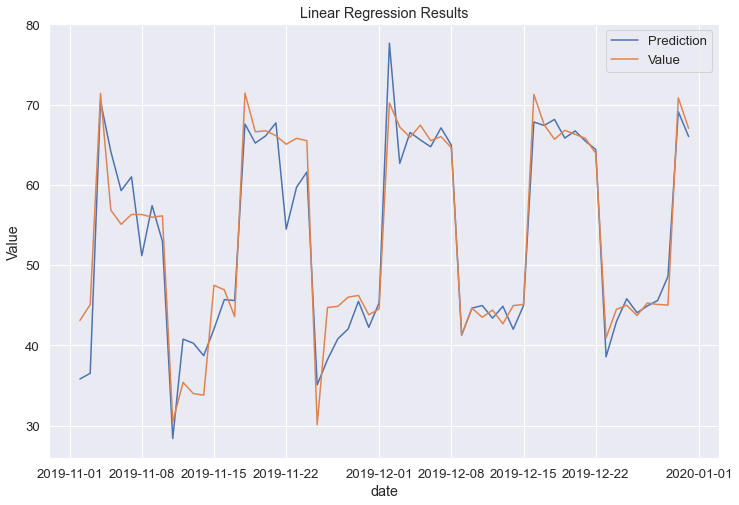

In [46]:
sns.set(font_scale = 1.2)
fig, ax = plt.subplots(figsize=[12,8])

plt.plot(dataframe2.date.iloc[-60:],prediction_val)
plt.plot(dataframe2.date.iloc[-60:],y_test)
plt.legend(['Prediction','Value'])

plt.title('Linear Regression Results')
plt.xlabel('date')
plt.ylabel('Value')

Feature: 0, Score: -0.27820
Feature: 1, Score: 0.06516
Feature: 2, Score: 0.03424
Feature: 3, Score: -0.00002
Feature: 4, Score: -0.05339
Feature: 5, Score: 0.02389
Feature: 6, Score: -0.08250
Feature: 7, Score: 0.29403
Feature: 8, Score: -0.38689
Feature: 9, Score: -0.00000
Feature: 10, Score: 0.22802
Feature: 11, Score: 0.03994
Feature: 12, Score: -0.00257
Feature: 13, Score: -0.90543
Feature: 14, Score: 0.19968
Feature: 15, Score: 0.15729
Feature: 16, Score: 0.37525
Feature: 17, Score: 0.05200
Feature: 18, Score: -0.26961
Feature: 19, Score: 0.71457
Feature: 20, Score: 0.27635
Feature: 21, Score: 0.08044
Feature: 22, Score: 0.13398


<AxesSubplot:>

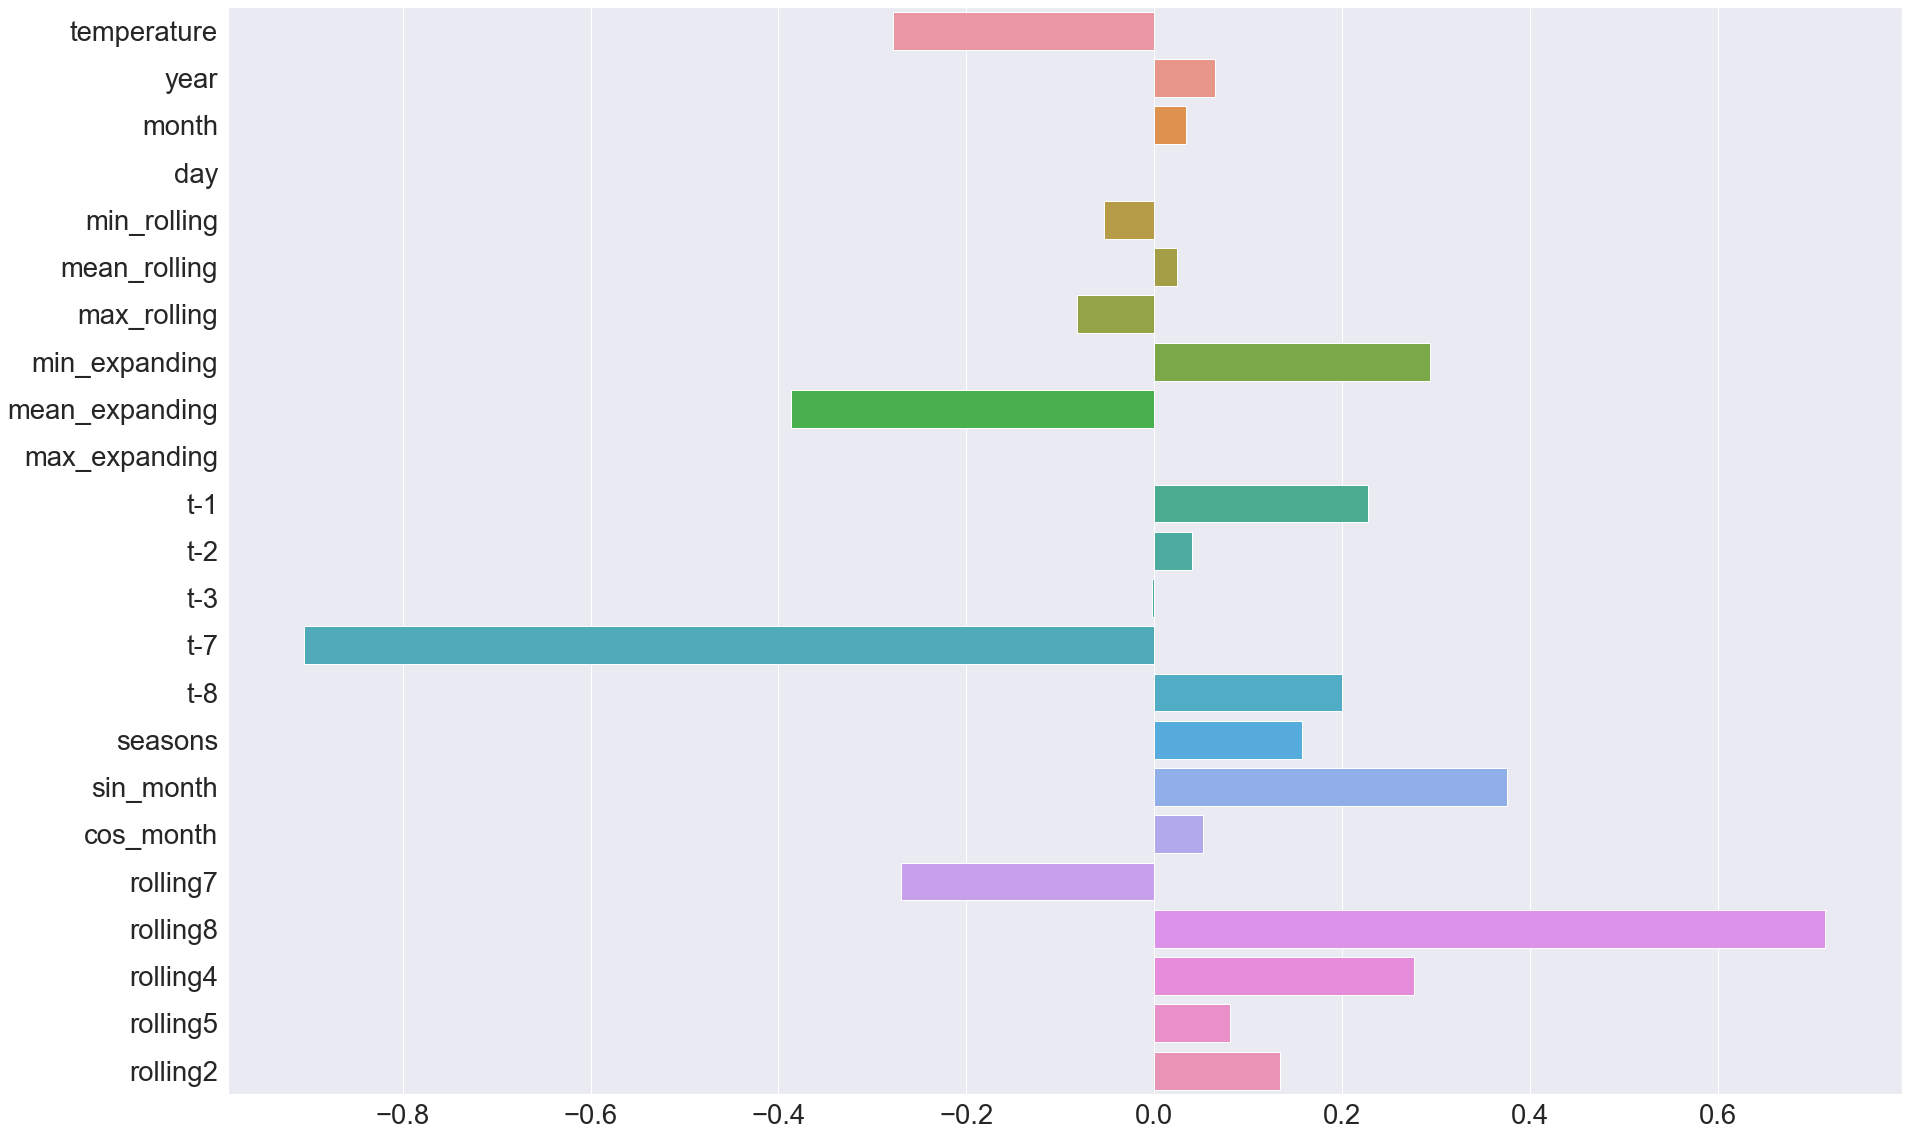

In [48]:
importance = lin_reg.coef_
# summarize feature importance

importance =pd.Series(importance)
importance.index=x_train.columns
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
f, ax = plt.subplots(figsize=(30, 20))
sns.set(font_scale = 2.5)
sns.barplot(x=importance, y=importance.index, data=df)
#plt.bar([x for x in range(len(importance))], importance)
#plt.show()


In [31]:
new_features=dataframe2.drop(columns=['t-7','temperature','t-8','t-1','day','t-3','max_rolling','mean_rolling',
                                      'mean_expanding','seasons','month','min_expanding','sin_month','cos_month'])

In [37]:
x_train_reg=new_features.iloc[:-60].drop(columns="value")
y_train_reg=new_features.iloc[:-60]["value"]
x_test_reg=new_features.iloc[-60:].drop(columns="value")
y_test_reg=new_features.iloc[-60:]["value"]


In [38]:
lin_reg_new = LinearRegression()
lin_reg_new=lin_reg_new.fit(x_train_reg.drop(columns="date"),y_train_reg)

Text(0, 0.5, 'Value')

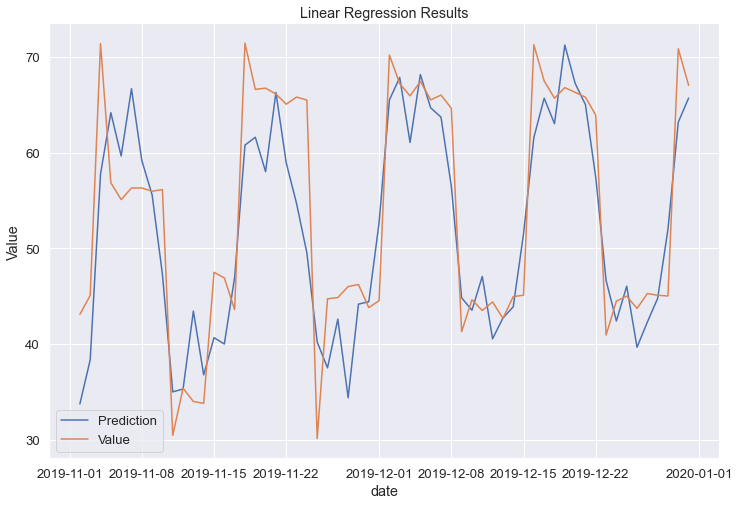

In [51]:
prediction_val_new = lin_reg_new.predict(x_test_reg.drop(columns="date"))

sns.set(font_scale = 1.2)
fig, ax = plt.subplots(figsize=[12,8])

plt.plot(dataframe2.date.iloc[-60:],prediction_val_new)
plt.plot(dataframe2.date.iloc[-60:],y_test_reg)
plt.legend(['Prediction','Value'])

plt.title('Linear Regression Results')
plt.xlabel('date')
plt.ylabel('Value')

In [53]:
print('Test scores,','\n','MSE: %.3f, RMSE: %.3f, R2 score: %.3f, MAPE: %.3f'%evaluatereg(y_test,prediction_val_new))


Test scores, 
 MSE: 39.202, RMSE: 6.261, R2 score: 0.734, MAPE: 9.660


In [64]:
params = [{ 'copy_X':[True, False],
            'n_jobs':[None,-1,1,2],
           'normalize': [True, False],
           'fit_intercept':[True,False]
       
}]
grid_LR = GridSearchCV(estimator=lin_reg, param_grid=params, scoring='neg_mean_squared_error',
                    cv=5, n_jobs = -1, verbose = 2)
grid_LR.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid=[{'copy_X': [True, False],
                          'fit_intercept': [True, False],
                          'n_jobs': [None, -1, 1, 2],
                          'normalize': [True, False]}],
             scoring='neg_mean_squared_error', verbose=2)

In [65]:
grid_LR.best_params_

{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'normalize': True}

In [66]:
lin_reg_tuned = LinearRegression(fit_intercept=False, normalize=True, copy_X=True, n_jobs=None)
lin_reg_tuned = lin_reg_tuned.fit(x_train,y_train)
prediction_val_tuned = lin_reg_tuned.predict(x_test)
prediction_val_train_tuned  = lin_reg_tuned.predict(x_train)

In [67]:
print('Test scores,','\n','MSE: %.3f, RMSE: %.3f, R2 score: %.3f, MAPE: %.3f'%evaluatereg(y_test,prediction_val_tuned))
print('Train scores,','\n','MSE: %.3f, RMSE: %.3f, R2 score: %.3f, MAPE: %.3f'%evaluatereg(y_train,prediction_val_train_tuned))

Test scores, 
 MSE: 13.686, RMSE: 3.699, R2 score: 0.907, MAPE: 5.576
Train scores, 
 MSE: 10.332, RMSE: 3.214, R2 score: 0.939, MAPE: 5.219
